<a href="https://colab.research.google.com/github/kalpadas599/VOIS_AICTE_Oct2025_KalpaDas/blob/main/Airbnb_Data%5BHotel_Booking%5D_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data Wrangling<h1/>

In [ ]:
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# Step 2: Load the Airbnb NYC dataset
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')

## Access The Data

In [ ]:
# Preview data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Step 3: Check basic information
df.info()

df.duplicated().value_counts()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102329,1.025990e+05,102310,102191,102570,102583,102591.000000,102591.000000,102067,...,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,47756,2
unique,NaN,61280,NaN,2,13189,7,224,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,House Rules 1. Check-in is 4 pm local time. If...,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254,NaN,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,...,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000,NaN,NaN
max,5.736742e+07,NaN,9.876313e+10,NaN,NaN,NaN,NaN,40.916970,-73.705220,NaN,...,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000,NaN,NaN


In [ ]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


## Clean the Data

In [ ]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
# Drop columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

In [ ]:
# Remove $ and , from price and service fee
df['price'] = (
    df['price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df['service fee'] = (
    df['service fee']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [ ]:
# Rename columns
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
#Inspect column names
print(df.columns.tolist())

['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [ ]:
#Match the right names
df['host id'] = df['host id'].astype(str)

In [ ]:
#Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Convert data types
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction_year'] = df['construction_year'].astype(int)

In [ ]:
# Correct spelling
df.loc[df['neighbourhood_group'] == 'brookin', 'neighbourhood_group'] = 'Brooklyn'

# Remove invalid availability values
df = df.drop(df[df['availability_365'] > 500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,83389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   name                            83389 non-null  object        
 2   host_id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host_name                       83389 non-null  object        
 5   neighbourhood_group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country_code                    83389 non-null  object        
 11  instan

## Exploratory Data Analysis(EDA)

In [ ]:
df.describe()

,lat,long,instant_bookable,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


What are the different Properrty Types in the Dataset

In [ ]:
property_types =  df['room_type'].value_counts().to_frame()
property_types

,count
room_type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Properrty Types & their count in the Dataset')

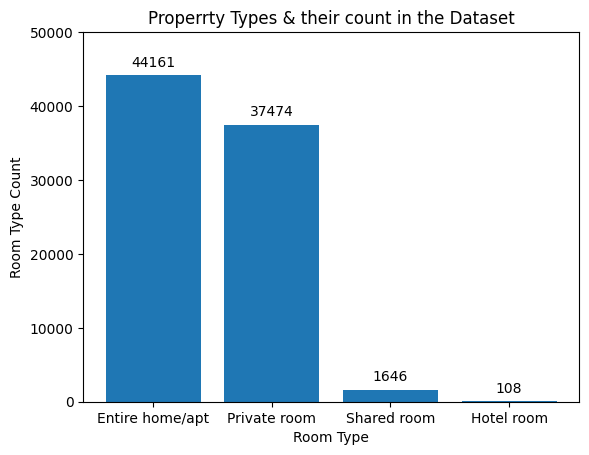

In [ ]:
#Room type count on bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Properrty Types & their count in the Dataset')

Which neighbourhood group has the highest number of listings?

In [ ]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group

,count
neighbourhood_group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


In [ ]:
# Correct the misspelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

# Verify the correction
display(df['neighbourhood_group'].value_counts().to_frame())

,count
neighbourhood_group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


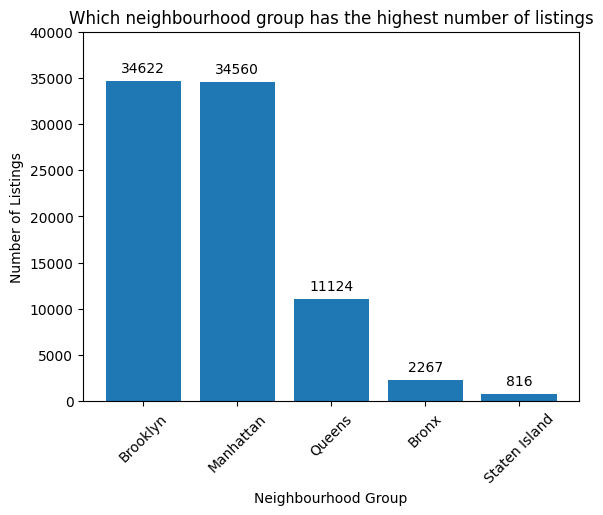

In [ ]:
#Which neighbourhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"], padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which neighbourhood group has the highest number of listings');

Which neighbourhood group have the highest agerage prices for Airbnb listings?

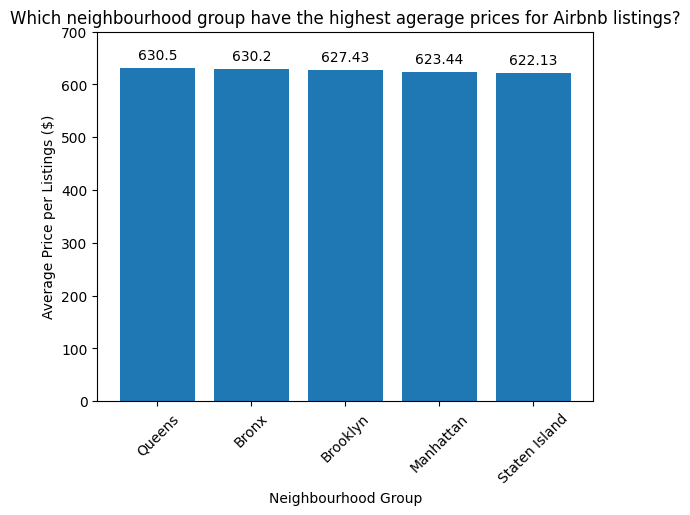

In [ ]:
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:,"price_$"], 2),label_type = 'edge', padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation=45);
plt.title('Which neighbourhood group have the highest agerage prices for Airbnb listings?');

Is there a relationship between the construction year of property and price?

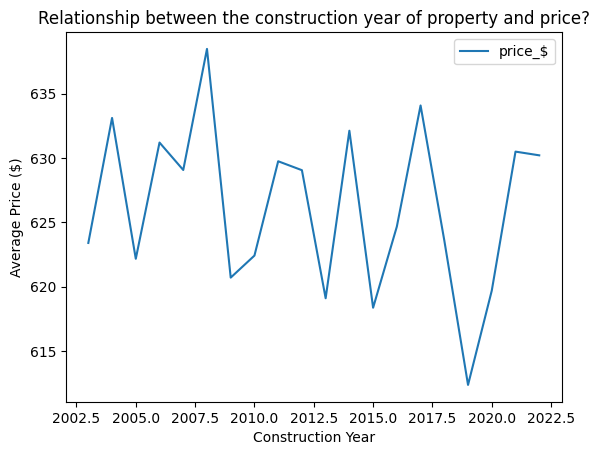

In [ ]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['construction_year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Relationship between the construction year of property and price?');

Who are the top 10 hosts by calculated host listing count?

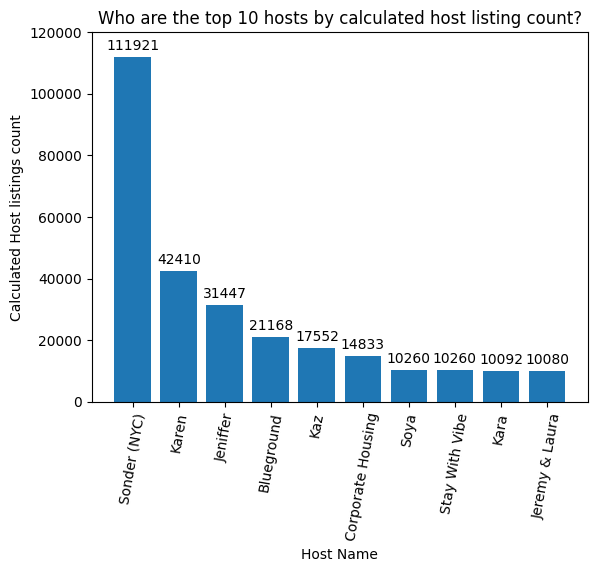

In [ ]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated_host_listings_count"]);
plt.bar_label(hosts_bar, labels=hosts.loc[:,"calculated_host_listings_count"].astype(int), label_type = 'edge', padding=3);
plt.ylim([0,120000]);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host listings count');
plt.xticks(rotation=80);
plt.title('Who are the top 10 hosts by calculated host listing count?');

Are hosts with verified identities more likely to receive positive reviews?

In [ ]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
review

,review_rate_number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


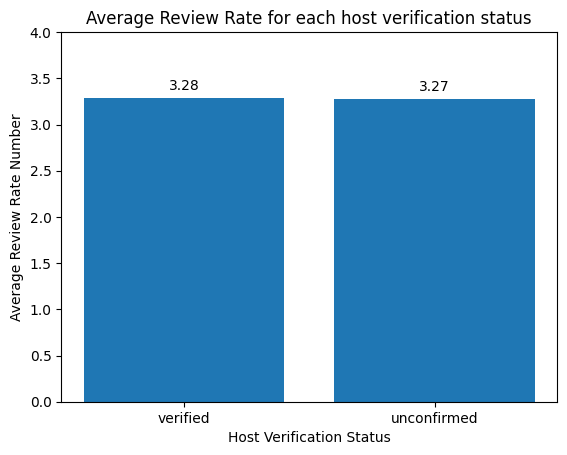

In [ ]:
review_bar = plt.bar(review.index, review.loc[:,"review_rate_number"]);
plt.bar_label(review_bar, labels=round(review.loc[:,"review_rate_number"], 2), padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each host verification status');

/tmp/ipython-input-2938729266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_identity_verified', y='review_rate_number', data=df, palette=[base_color, 'lightgray'])


Text(0.5, 1.0, 'Average Review Rate for each host verification status')

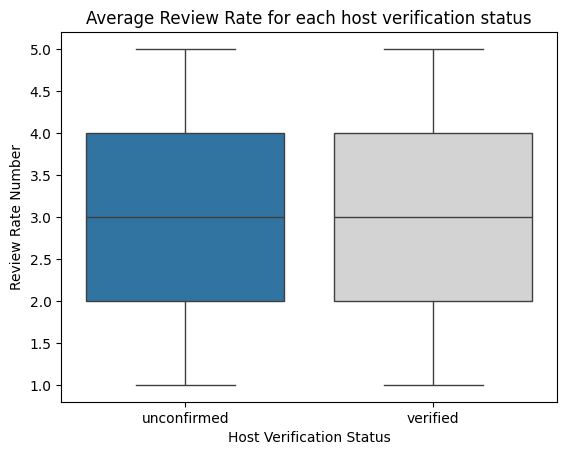

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(x='host_identity_verified', y='review_rate_number', data=df, palette=[base_color, 'lightgray'])
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each host verification status')

Is there a corelation between the price of a listing and it's service fee?

In [ ]:
#Is there a corelation between the price of a listing and it's service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976475)

Text(0.5, 1.0, "Corelation between the price of a listing and it's service fee")

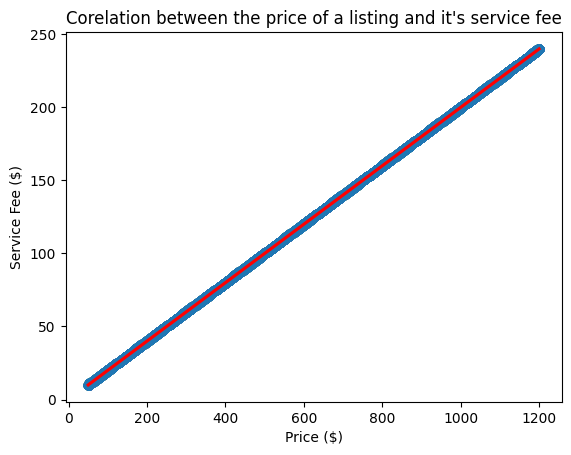

In [ ]:
sns.regplot(x='price_$', y='service_fee_$', data=df, line_kws={'color': 'red'})
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Corelation between the price of a listing and it\'s service fee')

What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [ ]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()
ARRN

review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

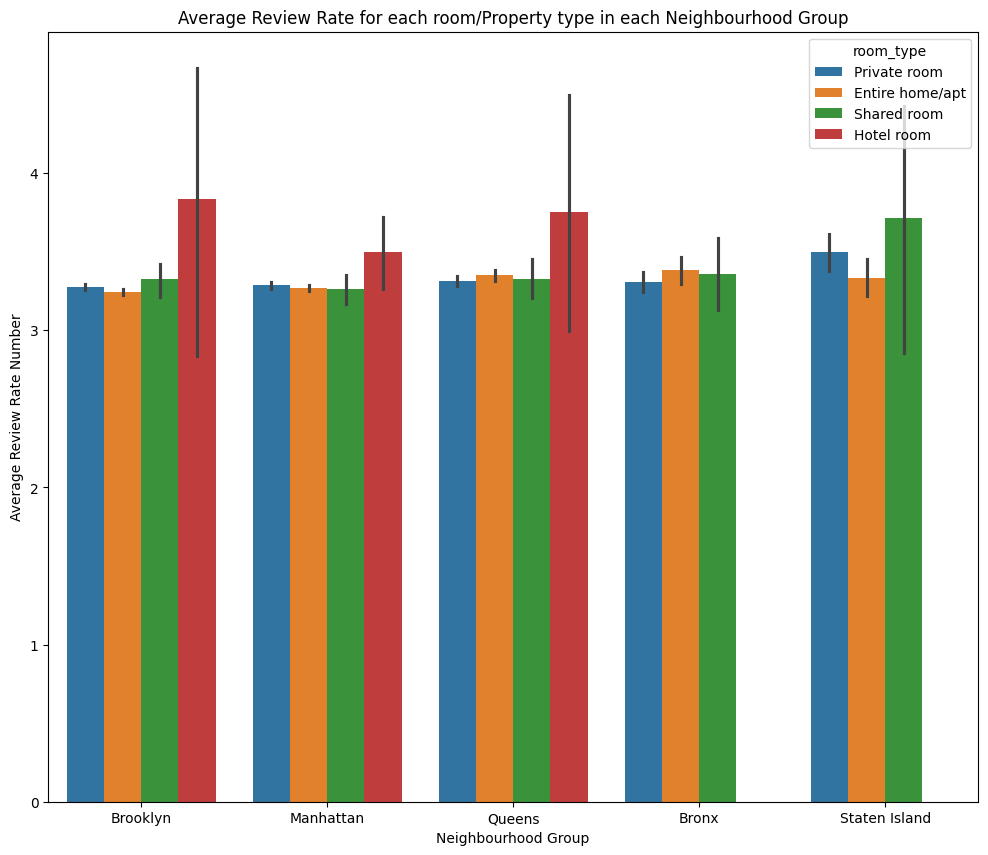

In [ ]:
plt.figure(figsize=(12, 10));
sns.barplot(x='neighbourhood_group', y='review_rate_number', hue='room_type', data=df);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each room/Property type in each Neighbourhood Group');

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'A regression plot between the calculated host listings count and availability')

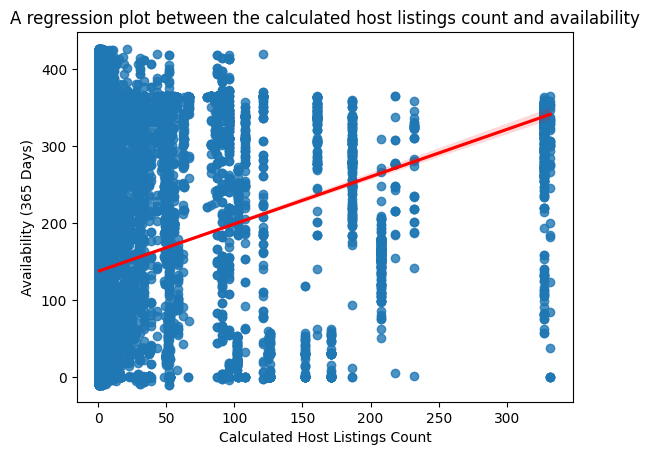

In [ ]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x='calculated_host_listings_count', y='availability_365', line_kws={'color': 'red'})
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (365 Days)')
plt.title('A regression plot between the calculated host listings count and availability')

In [ ]:
df['calculated_host_listings_count'].corr(df['availability_365'])

np.float64(0.13599714715703384)

In [ ]:
df.to_csv('airbnb_cleaned.csv', index=False)